# Week 7
# Logarithmic Regression and Polynomial Regression

What if the data is actually more complex than a simple straight line? A simple way to do this is to powers of original features as new features, then train a linear model on this extended set of features. This technique is called **Polynomial Regression**.

## Polynomial Regression: Model Representation
- The polynomial regression model assumes that the relationship between the input variable $X$ and the output variable $Y$ can be approximately described as
$$Y \approx f(X) = \theta_0 + \theta_1 X + \theta_2 X^2 +\cdots + \theta_d X^d.$$
- There is a single input variable $X$, which appears in each term expect for the constant term.
- The degree $d$ is determined by the researcher. In pratice $d$ is rarely above 4.

To illustrate the similarities and differences between linear regression and polynomial regression, let's consider the following dataset.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

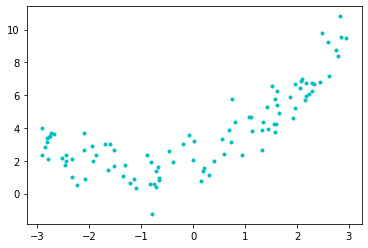

In [6]:
# Generate a data set
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'c.')

Find the best linear fit of the data, and calculate the MSE.

In [7]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

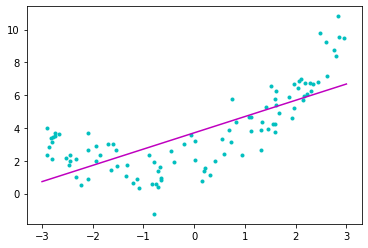

In [8]:
plt.plot(X, y, 'c.')
x_coordinates = np.array([-3, 3])
y_coordinates = x_coordinates * model_lr.coef_[0] + model_lr.intercept_
plt.plot(x_coordinates, y_coordinates, 'm-')

In [9]:
from sklearn.metrics import mean_squared_error
predictions = model_lr.predict(X)
mse = mean_squared_error(y, predictions)
print("MSE:", mse)

MSE: 2.800725785017949


## Polynomial Regression: Training Algorithm
The polynomial regression can actually be treated as multilinear regression with feature transformation in the following way:
1. Transform the original feature $X$ to a set of new features:
    - $Z_1 = X$
    - $Z_2 = X^2$
    - $Z_3 = X^3$
    - $\cdots$
    - $Z_d = X^d$
2. Then the model can be expressed as a multilinear model on $Z$'s:
$$Y \approx \theta_0 + \theta_1Z_1 + \theta_2Z_2 +\cdots + \theta_dZ_d$$.
3. Train the model as multilinear regression (use the normal equation or gradient descent)
    - To use the normal equation, the matrix $\textbf{X}$ and $\textbf{y}$ should be defined as
    $$\textbf{X} = \begin{pmatrix}
    1 & x^{(1)} & (x^{(1)})^2 & \cdots & (x^{(1)})^d \\
    1 & x^{(2)} & (x^{(2)})^2 & \cdots & (x^{(2)})^d \\
    \vdots & \vdots & \vdots &\ddots & \vdots \\
    1 & x^{(m)} & (x^{(m)})^2 & \cdots & (x^{(m)})^d \\
    \end{pmatrix}, \textbf{y} = \begin{pmatrix}
    y^{(1)}\\
    y^{(2)}\\
    \vdots\\
    y^{(m)}
    \end{pmatrix}$$

In [19]:
# Apply the normal equation to find the degree 2 polynomial fit of X and y
ones = np.ones([m, 1]) # The first column of X
X2 = X ** 2 # This is third column of X
X_matrix = np.hstack([ones, X, X2]) # Concatenate three columns horizontally
# print(X_matrix)
theta = np.linalg.inv(X_matrix.T.dot(X_matrix)).dot(X_matrix.T).dot(y)
print(theta) # theta 1, theta 2, theta 3

[[1.96824995]
 [1.0643867 ]
 [0.51532693]]


In [28]:
# Use sklearn
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_features.fit(X)
X_poly = poly_features.transform(X)
# print(X_poly)
model_pr = LinearRegression()
model_pr.fit(X_poly, y)
print(model_pr.coef_, model_pr.intercept_)

[[1.0643867  0.51532693]] [1.96824995]


In [29]:
# Calculate the MSE of the degree-2 polynomial regression
predictions = model_pr.predict(X_poly)
mse = mean_squared_error(y, predictions)
print("MSE:", mse)

MSE: 0.887287106145888


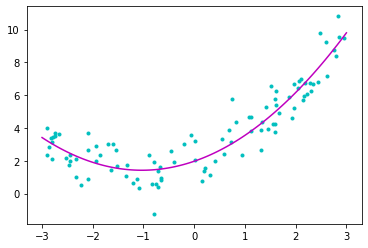

In [30]:
# Visualize the regression curve
plt.plot(X, y, 'c.') # Plot points from training data
x_coordinates = np.linspace(-3, 3, 100) # Create a list of x in interval [-3,3]
# Use the model to predict the corresponding y value
x_coordinates_poly = poly_features.transform(x_coordinates.reshape([-1, 1]))
# Poly features transforms new list of x coordinates
y_coordinates = model_pr.predict(x_coordinates_poly)
plt.plot(x_coordinates, y_coordinates, 'm-')

In [31]:
# Reshape: change the size ofa numpy array
x_coordinates = np.linspace(-3, 3, 100)
print(x_coordinates.shape)
# However, the polynomial feature transform function requires that values are 
# listed vertically.
x_reshaped = x_coordinates.reshape([-1, 1]) # -1 is simply a placeholder
print(x_reshaped.shape)

(100,)
(100, 1)


## Polynomial Regression: Overfitting
Polynomial regression with greater $d$ tends to fit the training data better. However, the performance may not carry to new data.
<img src="https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image5.png" width="600">
<img src="https://miro.medium.com/fit/c/1838/551/0*Wup-0b5KI6-8cJB4.jpg" width="600">

In [41]:
# Train a degree 20 polynomial to fit X and y
poly_features = PolynomialFeatures(degree=20, include_bias=False)
# poly_features.fit(X)
# X_poly = poly_features.transform(X)
X_poly = poly_features.fit_transform(X)

model_pr = LinearRegression()
model_pr.fit(X_poly, y)
predictions = model_pr.predict(X_poly)
mse = mean_squared_error(y, predictions)
print("MSE:", mse)

MSE: 0.6199522435175491


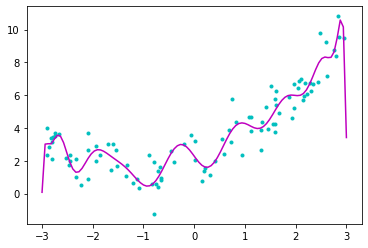

In [46]:
plt.plot(X, y, 'c.')
x_coordinates = np.linspace(-3, 3, 100)
x_coordinates_poly = poly_features.transform(x_coordinates.reshape([-1, 1]))
y_coordinates = model_pr.predict(x_coordinates_poly)
plt.plot(x_coordinates, y_coordinates, 'm-')
# plt.ylim(0, 10)

## Identify Overfitting:
1. Train-test split
2. Learning curve
3. Cross validation
4. Visualization 

## Other Expansions of Linear Regression
- Exponential or logarithmic terms
- Polynomial with multiple variables
- Local polynomial
- Classification

# Homework
Perform 3-fold cross validation on TV vs. Sales by the following the instructions:
1. Use train_test split twice to randomly split the data into 3 subsets `data1`, `data2`, `data3`, each containing one third of data.
2. Train polynomial regression model with degree = 1, 2, 5, 10 on `data1` and `data2`, calculate the MSE on `data3`.
3. Train polynomial regression model with degree = 1, 2, 5, 10 on `data2` and `data3`, calculate the MSE on `data1`.
4. Train polynomial regression model with degree = 1, 2, 5, 10 on `data1` and `data4`, calculate the MSE on `data1`.
5. Now each of the four models has three mse values. Compare the average mse value of the models. Which model has the lowest average MSE?